In [1]:
# используемые библиотеки
import numpy as np
import scipy.stats as sts
import math
import matplotlib.pyplot as plt
%matplotlib inline

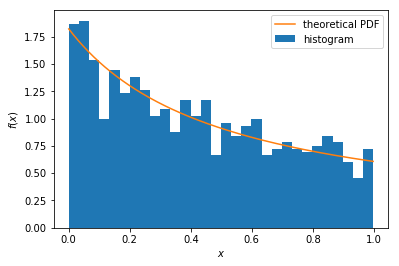

In [2]:
# Выберите ваше любимое непрерывное распределение
C = 2.0 #параметр распределения
rv = sts.bradford( C ) # распределение Бредфорда

# Сгенерируйте из него выборку объёма 1000
SAMPLE_SIZE= 1000
x =  np.sort( rv.rvs(SAMPLE_SIZE) )

# постройте гистограмму выборки
plt.hist( x, bins=30, density='normed', label='histogram' )

# и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины
plt.plot( x, rv.pdf(x), label='theoretical PDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()
plt.show()

### Формулы для расчета параметров распределения Бредфорда 
Согласно https://www.vosesoftware.com/riskwiki/Bradforddistribution.php,
распределение Бредфорда является усеченным на отрезке распределением Парето.

<table width=100%><tr>
    <td width=20%>
Матожидание:</td><td>
$$\frac{\theta(max - min) + k( min(\theta + 1) - max)}{\theta k}$$
где $k=\log(\theta + 1)$
</td><tr><td>
Дисперсия:</td><td>
$$\frac{(max - min)^2(\theta(k - 2) + 2k)}{2\theta k^2}$$
</td></tr></table>

Для отрезка \[0, 1\] получаем:

<table width=100%><tr>
    <td width=20%>
Матожидание:</td><td>
$$\frac{\theta - k}{\theta k}$$
где $k=\log(\theta + 1)$
</td><tr><td>
Дисперсия:</td><td>
$$\frac{\theta(k - 2) + 2k}{2\theta k^2}$$
</td></tr></table>


In [3]:
# матожидание распределения Бредфорда для x в диапазоне [0,1]
# min = 0, max = 1, theta = C
def bradford_mean(theta):
    k = math.log(theta + 1.0)
    return (theta - k) / (theta * k)

# дисперсия распределения Бредфорда для x в диапазоне [0,1]
# min = 0, max = 1, theta = C
def bradford_variance(theta):
    k = math.log(theta + 1.0)
    return ( theta*(k-2.0) + 2.0*k ) / ( 2.0*theta*(k**2.0) )
    

### Расчет параметров нормальных распределений, аппроксимрующих выборочные средние при различных n
Согласно центральной предельной теореме, ${\bar {X}}_{n}$ имеет распределение близкое к $N(\mu ,\sigma ^{2}/n)$

Таким образом, для вычисления параметров нормального распределения выборочных средних, достаточно взять:<br>
$\mu$ = теоретическое матожидание выборочных средних<br>
$\sigma$ = корень квадратный из теоретической дисперсии выборочных средних, деленной на объем одной выборки (n).

volume:  3
real mean: 0.4055462523793731
mu:  0.4102392266268373
sigma:  0.16502906505281065
error:  0.004692974247464232


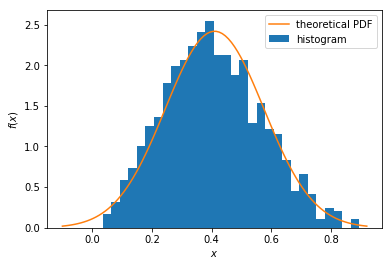

volume:  5
real mean: 0.4149802603430471
mu:  0.4102392266268373
sigma:  0.1278309641179432
error:  -0.004741033716209764


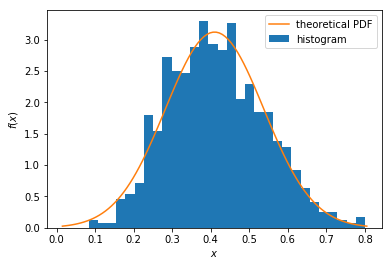

volume:  10
real mean: 0.4088098702816035
mu:  0.4102392266268373
sigma:  0.09039014157341188
error:  0.0014293563452338343


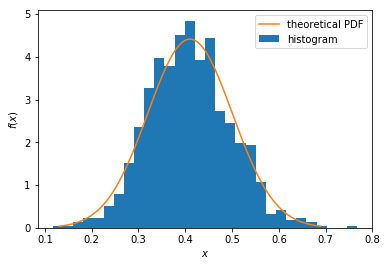

volume:  50
real mean: 0.40888371000707324
mu:  0.4102392266268373
sigma:  0.04042370021079575
error:  0.0013555166197640744


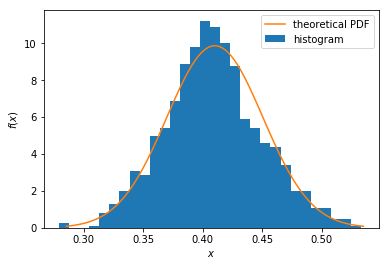

In [4]:
def generate( n ):
    rv = sts.bradford( C ) # распределение Бредфорда
    
    # сгенерируйте 1000 выборок объёма n 
    print('volume: ', n)
    x = np.sort( rv.rvs(( SAMPLE_SIZE, n) ))    
    #print(x.shape)
    
    # постройте гистограммы распределений их выборочных средних
    x_means = np.mean(x, 1)
    #print(x_means.shape)
    real_mean = np.mean(x_means) 
    print('real mean:', real_mean)
    plt.hist( x_means, 30, density='normed', label='histogram')
    
    # Используя информацию о среднем и дисперсии исходного распределения 
    # посчитайте значения параметров нормальных распределений, 
    # которыми приближается распределение выборочных средних
    
    # можно было и так посчитать:
    #mean, var = sts.bradford.stats(C, moments='mv')
    #print('bradford mean: ', mean)
    #print('bradford deviation: ', math.sqrt(var/n))
    
    #но мы не ищем легких путей:
    bradford_var = bradford_variance( C )
    #print('bradford variance: ', bradford_var)
    mu = bradford_mean( C )    
    sigma = math.sqrt( bradford_var / n )    
    print('mu: ',  mu)
    print('sigma: ', sigma)
    print('error: ', mu - real_mean)
    
    # Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения
    norm = sts.norm( loc=mu, scale=sigma)
    x2 = np.linspace(norm.ppf(0.001),
                     norm.ppf(0.999), 100)
    
    plt.plot( x2, norm.pdf( x2 ), label='theoretical PDF')
    
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.legend()

    plt.show()

generate( 3 )
generate( 5 )
generate( 10 )
generate( 50 )

volume:  1000
real mean: 0.4104198344927462
mu:  0.4102392266268373
sigma:  0.009039014157341188
error:  -0.00018060786590889943


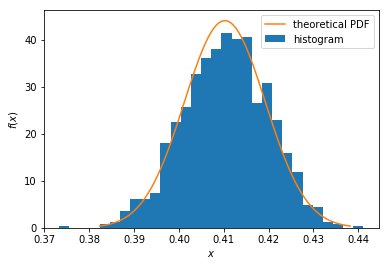

In [5]:
#дополнительный прогон на большом n,
# чтобы проверить сходимость ошибки оценки среднего
generate( 1000 )

### Выводы по результатам выполнения задания
В соответствии с центральной предельной теоремой, при увеличении объема выборки, график распределения выборочного среднего сжимается и вытягивается вверх (<b>обратите внимание на масштабы по осям x и y</b>). Точность аппроксимации растет с ростом n.

Так как в качестве исходного распределения мы взяли сильно скошенное влево распределение Бредфорда (см. самый первый график), мы видим искажение:
1. Гистограмма скошена влево при маленьких n (см. график для n = 3, например).
2. Ошибка оценки среднего слабо сходится с ростом n (см. значение error при n = 1000).

См. ниже результаты доп. проверок при размере выборки n = 5:
1. Если уменьшать параметр С для распределения Бредфорда, оно становится менее скошенным (ближе к симметричному), а искажение и ошибка оценки уменьшаются.<br>
2. И наоборот, при увеличении С распределение Бредфорда становится более скошенным, а искажение и ошибка оценки увеличиваются.

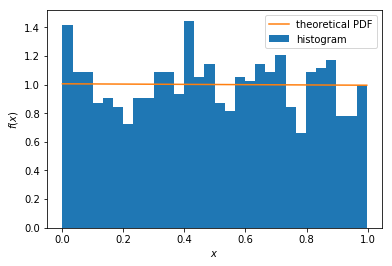

volume:  5
real mean: 0.4986490360090338
mu:  0.4991708071304383
sigma:  0.12909933836371926
error:  0.0005217711214045018


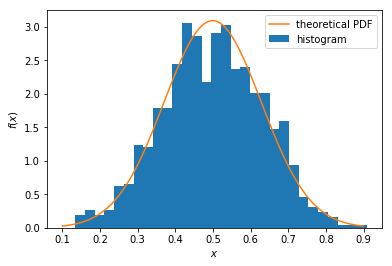

In [6]:
C = 0.01 #параметр распределения
rv = sts.bradford( C ) # распределение Бредфорда

# Сгенерируйте из него выборку объёма 1000
SAMPLE_SIZE= 1000
x =  np.sort( rv.rvs(SAMPLE_SIZE) )

# постройте гистограмму выборки
plt.hist( x, bins=30, density='normed', label='histogram' )

# и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины
plt.plot( x, rv.pdf(x), label='theoretical PDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()
plt.show()

generate(5)

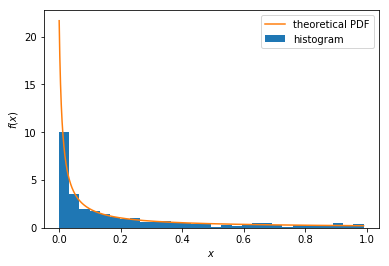

volume:  5
real mean: 0.20586632075631922
mu:  0.20667906533553165
sigma:  0.11274440648337422
error:  0.0008127445792124321


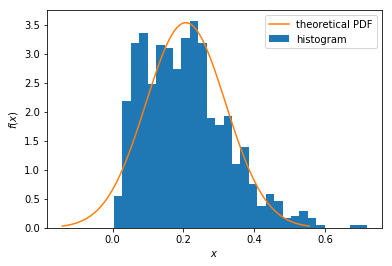

In [7]:
C = 100 #параметр распределения
rv = sts.bradford( C ) # распределение Бредфорда

# Сгенерируйте из него выборку объёма 1000
SAMPLE_SIZE= 1000
x =  np.sort( rv.rvs(SAMPLE_SIZE) )

# постройте гистограмму выборки
plt.hist( x, bins=30, density='normed', label='histogram' )

# и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины
plt.plot( x, rv.pdf(x), label='theoretical PDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()
plt.show()

generate(5)